In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.decomposition import PCA
from sklearn.metrics import *
import pandas_profilling as pp

%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profilling'

In [3]:
# define path to the data file

filepath='US_O365Home_PDP_Order_NoOrder_CSV.csv'

In [4]:
# Data ingestion

df = pd.read_csv(filepath)
df.head()

MC1ID  Paid Order Exists  Try Exists  \
0  50637eab03a94c59bb460e2e89adf021                0.0         0.0   
1  0ae3949b44364d0d9686d8022b3229f4                0.0         0.0   
2  bb7e2062bd4142a194eaa8818bf04169                1.0         0.0   
3  c3d457532b31409da308173a867c96b5                1.0         0.0   
4  0bc59fdb65094105bb31a39094df49d4                1.0         0.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
0                   3.0           3.0           0.0              1.0   
1                   2.0           2.0           1.0              0.0   
2                   1.0           1.0           0.0              1.0   
3                   1.0           1.0           0.0              1.0   
4                   1.0           1.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                        0.0                   0.0                      0.0   
1                        0.0                   0.0                      0.0   
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                      663.333333                                   NaN   
1                      540.500000                                  17.0   
2                     1514.000000                                  28.5   
3                     2544.000000                                  21.0   
4                      865.000000                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0             145.0                         0.0                          4.0   
1               7.0                         0.0                          0.0   
2              76.0                         0.0                          0.0   
3             114.0                         0.0                          0.0   
4              34.0                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                       4.0                    0.0   
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  
0                             0.0                        0.0  
1                             0.0                        0.0  
2                             0.0                        0.0  
3                             0.0                        0.0  
4                             0.0                        2.0

## Exploratory Data Analysis (EDA)


In [5]:
df.shape

(2383, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 19 columns):
MC1ID                                   1779 non-null object
Paid Order Exists                       1779 non-null float64
Try Exists                              1779 non-null float64
Device Orders_Office                    1779 non-null float64
Total Visits                            1779 non-null float64
New Visitors                            1779 non-null float64
Return Visitors                         1779 non-null float64
Enter PDP from Office.com               1779 non-null float64
Enter PDP from Store                    1779 non-null float64
Enter PDP from O365 Web                 1779 non-null float64
Time Spent per Visit (seconds)          1582 non-null float64
Average Time Spent on Page (seconds)    635 non-null float64
Link Clicks (e4)                        1779 non-null float64
Link Clicks on OverviewTab              1779 non-null float64
Link Clicks on TechSpecsTab

In [7]:
df.describe()

Paid Order Exists   Try Exists  Device Orders_Office  Total Visits  \
count        1779.000000  1779.000000           1779.000000   1779.000000   
mean            0.102867     0.028106              0.010680      1.132659   
std             0.303870     0.165321              0.122766      0.486426   
min             0.000000     0.000000              0.000000      1.000000   
25%             0.000000     0.000000              0.000000      1.000000   
50%             0.000000     0.000000              0.000000      1.000000   
75%             0.000000     0.000000              0.000000      1.000000   
max             1.000000     1.000000              3.000000      7.000000   

       New Visitors  Return Visitors  Enter PDP from Office.com  \
count   1779.000000      1779.000000                1779.000000   
mean       0.519955         0.480045                   0.062957   
std        0.499742         0.499742                   0.256467   
min        0.000000         0.000000                   0.000000   
25%        0.000000         0.000000                   0.000000   
50%        1.000000         0.000000                   0.000000   
75%        1.000000         1.000000                   0.000000   
max        1.000000         1.000000                   3.000000   

       Enter PDP from Store  Enter PDP from O365 Web  \
count           1779.000000              1779.000000   
mean               0.320967                 0.411467   
std                0.521597                 0.544327   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                1.000000                 1.000000   
max                4.000000                 5.000000   

       Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
count                     1582.000000                            635.000000   
mean                       475.342801                            106.550429   
std                        859.000278                            239.215555   
min                          1.000000                              1.000000   
25%                         26.000000                              8.625000   
50%                        165.000000                             22.000000   
75%                        571.500000                             71.000000   
max                      11193.000000                           1772.000000   

       Link Clicks (e4)  Link Clicks on OverviewTab  \
count       1779.000000                 1779.000000   
mean          22.560427                    0.010118   
std           43.084832                    0.120502   
min            0.000000                    0.000000   
25%            2.000000                    0.000000   
50%            8.000000                    0.000000   
75%           26.000000                    0.000000   
max          950.000000                    2.000000   

       Link Clicks on TechSpecsTab  Link Clicks on ReviewTab  \
count                  1779.000000               1779.000000   
mean                      0.041034                  0.017426   
std                       0.325176                  0.168464   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  0.000000   
max                       8.000000                  4.000000   

       Link Clicks on FAQTab  Link Clicks on AddtoCartButton  \
count            1779.000000                     1779.000000   
mean                0.017426                        0.227094   
std                 0.178198                        1.408686   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000       

In [8]:
pp.ProfileReport(df)

NameError: name 'pp' is not defined

In [9]:
df['Paid Order Exists'].value_counts()

0.0    1596
1.0     183
Name: Paid Order Exists, dtype: int64

In [10]:
df['Try Exists'].value_counts()

0.0    1729
1.0      50
Name: Try Exists, dtype: int64

## Remove outliers and fill missing data

## Link Clicks

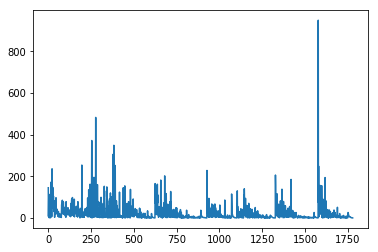

In [11]:
plt.plot(df['Link Clicks (e4)'])

In [12]:
idx =df.index[df['Link Clicks (e4)']>400]

In [13]:
idx.tolist()

[277, 1577]

In [14]:
df.drop(idx.tolist(), inplace= True)

### Time Spent per Visit (seconds)

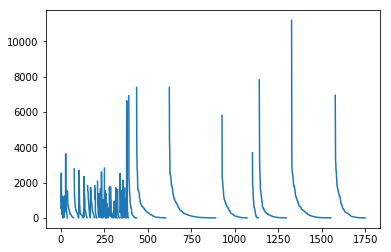

In [15]:
plt.plot(df['Time Spent per Visit (seconds)'])

In [16]:
idx =df.index[df['Time Spent per Visit (seconds)']>8000]
idx.tolist()

[1327]

In [17]:
df.drop(idx.tolist(), inplace= True)

### Average Time Spent on Page (seconds)

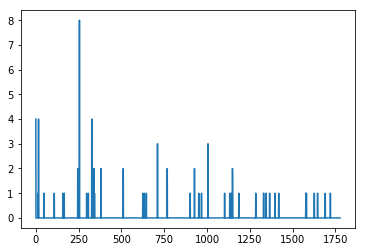

In [18]:
plt.plot(df['Link Clicks on TechSpecsTab'])

In [19]:
idx = df.index[df['Link Clicks on TechSpecsTab']>4]
idx.tolist()

[255]

In [20]:
df.drop(idx.tolist(), inplace = True)

### Link Clicks on ReviewTab

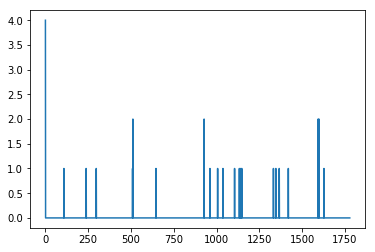

In [21]:
plt.plot(df['Link Clicks on ReviewTab'])

In [22]:
df[df['Link Clicks on ReviewTab']>2]

MC1ID  Paid Order Exists  Try Exists  \
0  50637eab03a94c59bb460e2e89adf021                0.0         0.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
0                   3.0           3.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                        0.0                   0.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                      663.333333                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0             145.0                         0.0                          4.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                       4.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  
0                             0.0                        0.0

In [23]:
idx = df.index[df['Link Clicks on ReviewTab']>2]
df.drop(idx.tolist(), inplace = True)

### Link Clicks on FAQTab

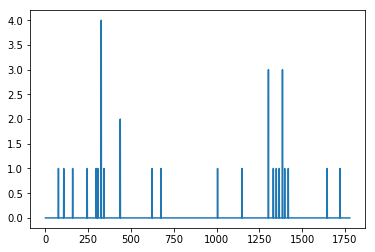

In [24]:
plt.plot(df['Link Clicks on FAQTab'])

In [25]:
idx = df.index[df['Link Clicks on FAQTab']>3]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on AddtoCartButton

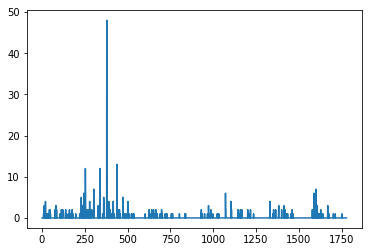

In [26]:
plt.plot(df['Link Clicks on AddtoCartButton'])

In [27]:
idx = df.index[df['Link Clicks on AddtoCartButton']>15]

In [28]:
idx.tolist()
df.drop(idx.tolist(), inplace=True)

### Count Plot

In [29]:
df.shape

(2376, 19)

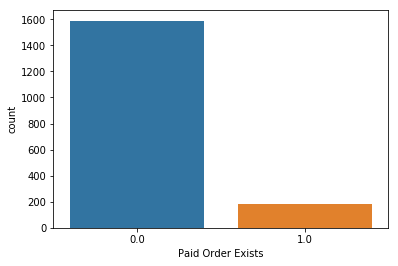

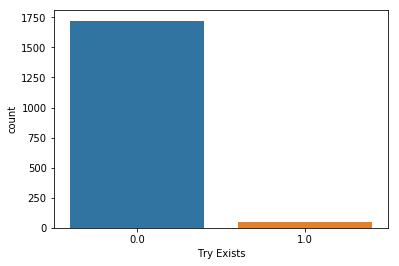

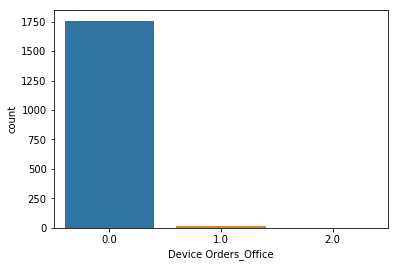

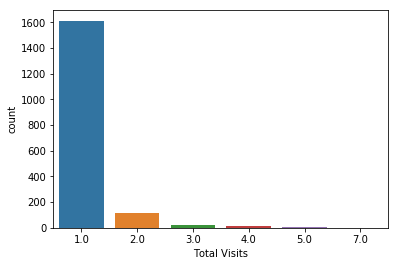

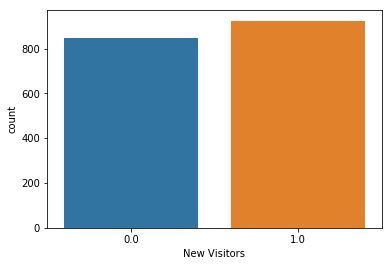

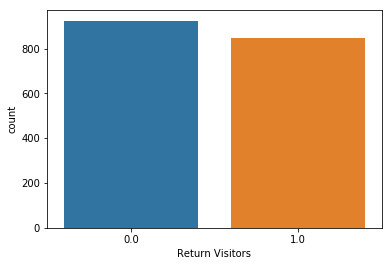

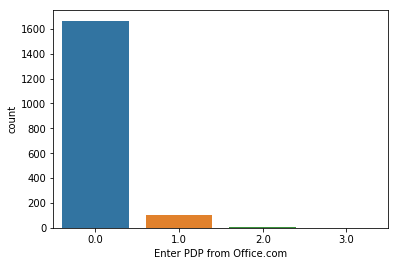

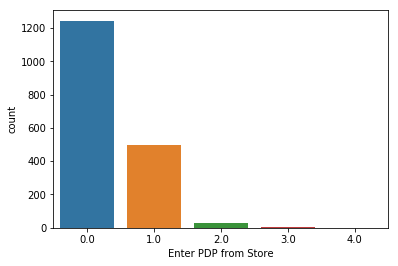

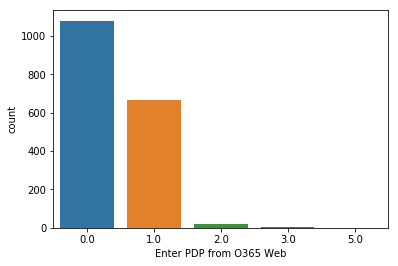

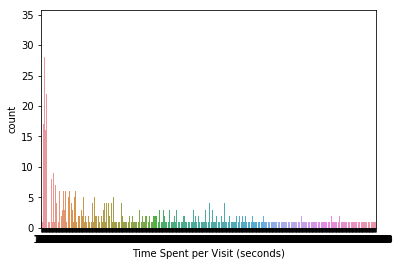

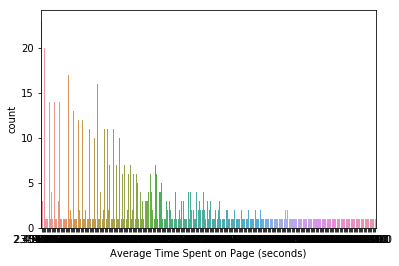

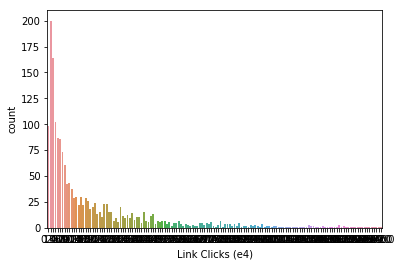

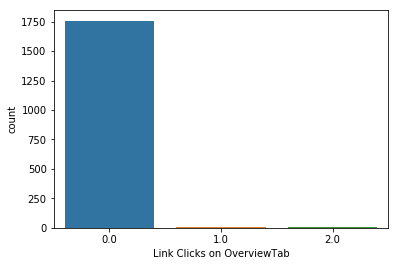

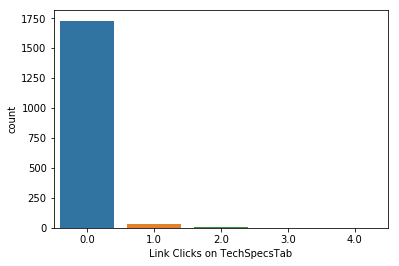

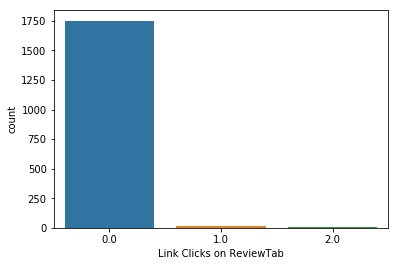

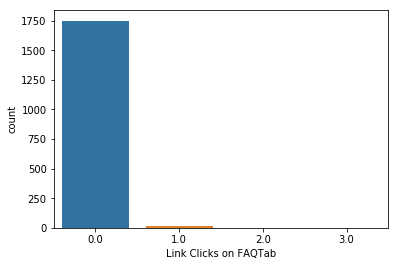

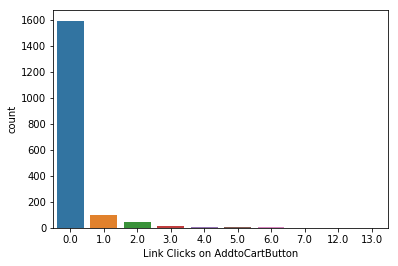

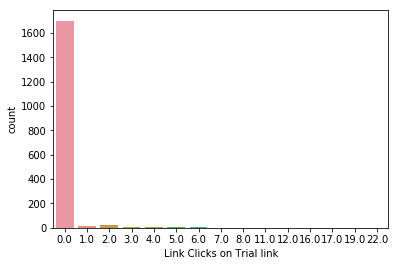

In [30]:
for c in range(1,19):
    sns.countplot(df.iloc[:,c])
    plt.show()

### Device Orders Office

In [31]:
df['Device Orders_Office'].value_counts()

0.0    1757
1.0      14
2.0       1
Name: Device Orders_Office, dtype: int64

In [32]:
idx = df.index[df['Device Orders_Office']==2]
df.drop(idx.tolist(), inplace=True)

### Total visits

In [33]:
df['Total Visits'].value_counts()

1.0    1612
2.0     118
3.0      22
4.0      14
5.0       4
7.0       1
Name: Total Visits, dtype: int64

In [34]:
idx = df.index[df['Total Visits']==7]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from Office.com

In [35]:
df['Enter PDP from Office.com'].value_counts()

0.0    1663
1.0     103
2.0       3
3.0       1
Name: Enter PDP from Office.com, dtype: int64

In [36]:
idx = df.index[df['Enter PDP from Office.com']==3]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from Store

In [37]:
df['Enter PDP from Store'].value_counts()

0.0    1240
1.0     497
2.0      27
3.0       4
4.0       1
Name: Enter PDP from Store, dtype: int64

In [38]:
idx = df.index[df['Enter PDP from Store']==4]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from O365 Web

In [39]:
df['Enter PDP from O365 Web'].value_counts()

0.0    1076
1.0     664
2.0      22
3.0       5
5.0       1
Name: Enter PDP from O365 Web, dtype: int64

In [40]:
idx = df.index[df['Enter PDP from O365 Web']==5]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on OverviewTab

In [41]:
df['Link Clicks on OverviewTab'].value_counts()

0.0    1754
1.0       9
2.0       4
Name: Link Clicks on OverviewTab, dtype: int64

### Link Clicks on TechSpecsTab

In [42]:
df['Link Clicks on TechSpecsTab'].value_counts()

0.0    1725
1.0      33
2.0       6
3.0       2
4.0       1
Name: Link Clicks on TechSpecsTab, dtype: int64

In [43]:
idx = df.index[df['Link Clicks on TechSpecsTab']==4]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on ReviewTab

In [44]:
df['Link Clicks on ReviewTab'].value_counts()

0.0    1745
1.0      17
2.0       4
Name: Link Clicks on ReviewTab, dtype: int64

### Link Clicks on FAQTab

In [45]:
df['Link Clicks on FAQTab'].value_counts()

0.0    1745
1.0      18
3.0       2
2.0       1
Name: Link Clicks on FAQTab, dtype: int64

In [46]:
idx = df.index[df['Link Clicks on FAQTab']==2]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on Trial link

In [47]:
df['Link Clicks on Trial link'].value_counts()

0.0     1693
2.0       27
1.0       12
3.0        8
4.0        8
6.0        4
5.0        3
8.0        2
22.0       2
7.0        1
16.0       1
19.0       1
11.0       1
12.0       1
17.0       1
Name: Link Clicks on Trial link, dtype: int64

In [48]:
idx = df.index[df['Link Clicks on Trial link']>9]
df.drop(idx.tolist(), inplace=True)

In [49]:
df.shape

(2362, 19)

In [50]:
df['Paid Order Exists'].value_counts()

0.0    1577
1.0     181
Name: Paid Order Exists, dtype: int64

In [51]:
df['Try Exists'].value_counts()

0.0    1708
1.0      50
Name: Try Exists, dtype: int64

In [52]:
df.columns

Index(['MC1ID', 'Paid Order Exists', 'Try Exists', 'Device Orders_Office',
       'Total Visits', 'New Visitors', 'Return Visitors',
       'Enter PDP from Office.com', 'Enter PDP from Store',
       'Enter PDP from O365 Web', 'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'Link Clicks on Trial link'],
      dtype='object')

## Correlation among the features

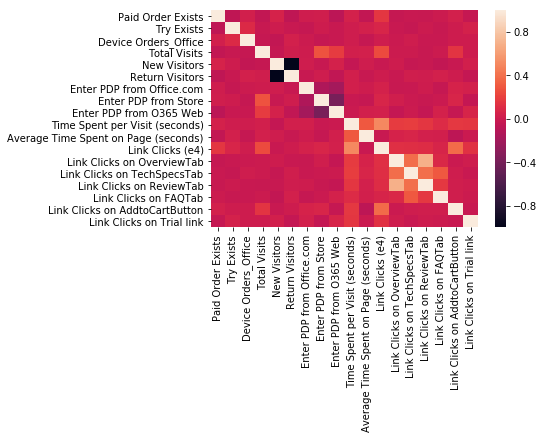

In [53]:
sns.heatmap(df.corr())

In [54]:
df_corr = df.corr()
df_corr.head()

Paid Order Exists  Try Exists  Device Orders_Office  \
Paid Order Exists              1.000000   -0.057965              0.032821   
Try Exists                    -0.057965    1.000000              0.100168   
Device Orders_Office           0.032821    0.100168              1.000000   
Total Visits                  -0.039636   -0.022524             -0.024296   
New Visitors                   0.055809    0.013730             -0.041999   

                      Total Visits  New Visitors  Return Visitors  \
Paid Order Exists        -0.039636      0.055809        -0.055809   
Try Exists               -0.022524      0.013730        -0.013730   
Device Orders_Office     -0.024296     -0.041999         0.041999   
Total Visits              1.000000     -0.030663         0.030663   
New Visitors             -0.030663      1.000000        -1.000000   

                      Enter PDP from Office.com  Enter PDP from Store  \
Paid Order Exists                      0.021817              0.030932   
Try Exists                            -0.028686              0.014068   
Device Orders_Office                   0.003624             -0.030698   
Total Visits                           0.012879              0.273853   
New Visitors                           0.017737             -0.021450   

                      Enter PDP from O365 Web  Time Spent per Visit (seconds)  \
Paid Order Exists                   -0.073774                        0.052971   
Try Exists                          -0.009020                        0.016682   
Device Orders_Office                -0.008600                        0.018634   
Total Visits                         0.181270                        0.034207   
New Visitors                         0.050058                       -0.036734   

                      Average Time Spent on Page (seconds)  Link Clicks (e4)  \
Paid Order Exists                                -0.043049          0.159437   
Try Exists                                        0.039465          0.073077   
Device Orders_Office                             -0.025955          0.017518   
Total Visits                                      0.044213          0.245701   
New Visitors                                      0.023183         -0.013622   

                      Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
Paid Order Exists                      -0.027563                    -0.011449   
Try Exists                             -0.013920                    -0.024272   
Device Orders_Office                   -0.007289                     0.018584   
Total Visits                            0.000196                     0.006810   
New Visitors                            0.011127                    -0.025139   

                      Link Clicks on ReviewTab  Link Clicks on FAQTab  \
Paid Order Exists                    -0.021619               0.006951   
Try Exists                            0.007256              -0.016397   
Device Orders_Office                 -0.009350              -0.008587   
Total Visits                         -0.018591               0.001870   
New Visitors                         -0.016692              -0.043783   

                      Link Clicks on AddtoCartButton  \
Paid Order Exists                           0.039835   
Try Exists                                  0.011934   
Device Orders_Office                        0.011655   
Total Visits                                0.151235   
New Visitors                               -0.010593   

                      Link Clicks on Trial link  
Paid Order Exists                     -0.029566  
Try Exists                             0.053088  
Device Orders_Office                   0.015601  
Total Visits                           0.009547  
New Visitors                           0.036780

In [55]:
df_corr.loc[(df_corr['Paid Order Exists']>0.05) | (df_corr['Paid Order Exists']<-0.05),'Paid Order Exists']

Paid Order Exists                 1.000000
Try Exists                       -0.057965
New Visitors                      0.055809
Return Visitors                  -0.055809
Enter PDP from O365 Web          -0.073774
Time Spent per Visit (seconds)    0.052971
Link Clicks (e4)                  0.159437
Name: Paid Order Exists, dtype: float64

In [56]:
( df_corr[(df_corr>0.05) | (df_corr<-0.05)])

Paid Order Exists  Try Exists  \
Paid Order Exists                              1.000000   -0.057965   
Try Exists                                    -0.057965    1.000000   
Device Orders_Office                                NaN    0.100168   
Total Visits                                        NaN         NaN   
New Visitors                                   0.055809         NaN   
Return Visitors                               -0.055809         NaN   
Enter PDP from Office.com                           NaN         NaN   
Enter PDP from Store                                NaN         NaN   
Enter PDP from O365 Web                       -0.073774         NaN   
Time Spent per Visit (seconds)                 0.052971         NaN   
Average Time Spent on Page (seconds)                NaN         NaN   
Link Clicks (e4)                               0.159437    0.073077   
Link Clicks on OverviewTab                          NaN         NaN   
Link Clicks on TechSpecsTab                         NaN         NaN   
Link Clicks on ReviewTab                            NaN         NaN   
Link Clicks on FAQTab                               NaN         NaN   
Link Clicks on AddtoCartButton                      NaN         NaN   
Link Clicks on Trial link                           NaN    0.053088   

                                      Device Orders_Office  Total Visits  \
Paid Order Exists                                      NaN           NaN   
Try Exists                                        0.100168           NaN   
Device Orders_Office                              1.000000           NaN   
Total Visits                                           NaN      1.000000   
New Visitors                                           NaN           NaN   
Return Visitors                                        NaN           NaN   
Enter PDP from Office.com                              NaN           NaN   
Enter PDP from Store                                   NaN      0.273853   
Enter PDP from O365 Web                                NaN      0.181270   
Time Spent per Visit (seconds)                         NaN           NaN   
Average Time Spent on Page (seconds)                   NaN           NaN   
Link Clicks (e4)                                       NaN      0.245701   
Link Clicks on OverviewTab                             NaN           NaN   
Link Clicks on TechSpecsTab                            NaN           NaN   
Link Clicks on ReviewTab                               NaN           NaN   
Link Clicks on FAQTab                                  NaN           NaN   
Link Clicks on AddtoCartButton                         NaN      0.151235   
Link Clicks on Trial link                              NaN           NaN   

                                      New Visitors  Return Visitors  \
Paid Order Exists                         0.055809        -0.055809   
Try Exists                                     NaN              NaN   
Device Orders_Office                           NaN              NaN   
Total Visits                                   NaN              NaN   
New Visitors                              1.000000        -1.000000   
Return Visitors                          -1.000000         1.000000   
Enter PDP from Office.com                      NaN              NaN   
Enter PDP from Store                           NaN              NaN   
Enter PDP from O365 Web                   0.050058        -0.050058   
Time Spent per Visit (seconds)                 NaN              NaN   
Average Time Spent on Page (seconds)           NaN              NaN   
Link Clicks (e4)                               NaN              NaN   
Link Clicks on OverviewTab                     NaN              NaN   
Link Clicks on TechSpecsTab                    NaN              NaN   
Link Clicks on ReviewTab                       NaN              NaN   
Link Clicks on FAQTab                          NaN              NaN   
Link Clicks on AddtoCartButton      

## Date Preparation from All Rows

In [57]:
#df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)].shape

In [58]:
#df_buy_try = df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)]
#df_buy_try.head()

In [59]:
#df_buy_try.shape

In [60]:
#df_buy_try['Paid Order Exists'].value_counts()

### Remove correlated columns before feature engineering

In [106]:
df.columns

Index(['MC1ID', 'Paid Order Exists', 'Try Exists', 'Device Orders_Office',
       'Total Visits', 'New Visitors', 'Return Visitors',
       'Enter PDP from Office.com', 'Enter PDP from Store',
       'Enter PDP from O365 Web', 'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'Link Clicks on Trial link'],
      dtype='object')

In [61]:
#cols_to_drop=['MC1ID', 'Return Visitors','Link Clicks on OverviewTab']
cols_to_drop=['MC1ID', 'Paid Order Exists','Try Exists', 'Return Visitors','Link Clicks on OverviewTab']

df_prep = df.drop(cols_to_drop, axis=1)
df_prep.head()

Device Orders_Office  Total Visits  New Visitors  \
2                   1.0           1.0           0.0   
3                   1.0           1.0           0.0   
4                   1.0           1.0           0.0   
5                   1.0           1.0           1.0   
6                   1.0           1.0           0.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   
5                        1.0                   0.0                      0.0   
6                        0.0                   1.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
2                          1514.0                                  28.5   
3                          2544.0                                  21.0   
4                           865.0                                   NaN   
5                             NaN                                   NaN   
6                           229.0                                   NaN   

   Link Clicks (e4)  Link Clicks on TechSpecsTab  Link Clicks on ReviewTab  \
2              76.0                          0.0                       0.0   
3             114.0                          0.0                       0.0   
4              34.0                          0.0                       0.0   
5               1.0                          0.0                       0.0   
6              10.0                          0.0                       0.0   

   Link Clicks on FAQTab  Link Clicks on AddtoCartButton  \
2                    0.0                             0.0   
3                    0.0                             0.0   
4                    0.0                             0.0   
5                    0.0                             0.0   
6                    0.0                             0.0   

   Link Clicks on Trial link  
2                        0.0  
3                        0.0  
4                        2.0  
5                        0.0  
6                        0.0

### Fill missing values with Mean

In [62]:
df_prep.fillna(df_prep.mean(), inplace=True)
df_prep.head()

Device Orders_Office  Total Visits  New Visitors  \
2                   1.0           1.0           0.0   
3                   1.0           1.0           0.0   
4                   1.0           1.0           0.0   
5                   1.0           1.0           1.0   
6                   1.0           1.0           0.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   
5                        1.0                   0.0                      0.0   
6                        0.0                   1.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
2                      1514.00000                             28.500000   
3                      2544.00000                             21.000000   
4                       865.00000                            102.226377   
5                       454.47665                            102.226377   
6                       229.00000                            102.226377   

   Link Clicks (e4)  Link Clicks on TechSpecsTab  Link Clicks on ReviewTab  \
2              76.0                          0.0                       0.0   
3             114.0                          0.0                       0.0   
4              34.0                          0.0                       0.0   
5               1.0                          0.0                       0.0   
6              10.0                          0.0                       0.0   

   Link Clicks on FAQTab  Link Clicks on AddtoCartButton  \
2                    0.0                             0.0   
3                    0.0                             0.0   
4                    0.0                             0.0   
5                    0.0                             0.0   
6                    0.0                             0.0   

   Link Clicks on Trial link  
2                        0.0  
3                        0.0  
4                        2.0  
5                        0.0  
6                        0.0

In [63]:
df_prep.shape

(2362, 14)

## Standard Scaler 

In [64]:
ss = StandardScaler()

np_tranform = ss.fit_transform(df_prep)

data = np_tranform.tolist()
cols_transform = df_prep.columns
df_standard = pd.DataFrame(data,columns=cols_transform ) 
df_standard.head()

Device Orders_Office  Total Visits  New Visitors  \
0             12.937183     -0.314318     -1.206236   
1             12.937183     -0.314318     -1.206236   
2             12.937183     -0.314318     -1.206236   
3             12.937183     -0.314318      1.113855   
4             12.937183     -0.314318     -1.206236   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                  -0.288146             -0.721120                 1.299333   
1                  -0.288146             -0.721120                -0.894930   
2                  -0.288146             -0.721120                -0.894930   
3                   4.402236             -0.721120                -0.894930   
4                  -0.288146              1.546731                -0.894930   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                    1.685643e+00                         -6.171073e-01   
1                    3.324316e+00                         -6.798840e-01   
2                    6.531200e-01                         -1.189482e-16   
3                   -9.043474e-17                         -1.189482e-16   
4                   -3.587209e-01                         -1.189482e-16   

   Link Clicks (e4)  Link Clicks on TechSpecsTab  Link Clicks on ReviewTab  \
0          1.895779                    -0.164432                 -0.120964   
1          3.205496                    -0.164432                 -0.120964   
2          0.448198                    -0.164432                 -0.120964   
3         -0.689187                    -0.164432                 -0.120964   
4         -0.378991                    -0.164432                 -0.120964   

   Link Clicks on FAQTab  Link Clicks on AddtoCartButton  \
0              -0.111088                       -0.286272   
1              -0.111088                       -0.286272   
2              -0.111088                       -0.286272   
3              -0.111088                       -0.286272   
4              -0.111088                       -0.286272   

   Link Clicks on Trial link  
0                  -0.192709  
1                  -0.192709  
2                   3.489717  
3                  -0.192709  
4                  -0.192709

In [65]:
df_standard.shape

(2362, 14)

In [66]:
df_standard.corr()

Device Orders_Office  Total Visits  \
Device Orders_Office                              1.000000     -0.024296   
Total Visits                                     -0.024296      1.000000   
New Visitors                                     -0.041999     -0.030663   
Enter PDP from Office.com                         0.003624      0.012879   
Enter PDP from Store                             -0.030698      0.273853   
Enter PDP from O365 Web                          -0.008600      0.181270   
Time Spent per Visit (seconds)                    0.017953      0.032799   
Average Time Spent on Page (seconds)             -0.015511      0.029755   
Link Clicks (e4)                                  0.017518      0.245701   
Link Clicks on TechSpecsTab                       0.018584      0.006810   
Link Clicks on ReviewTab                         -0.009350     -0.018591   
Link Clicks on FAQTab                            -0.008587      0.001870   
Link Clicks on AddtoCartButton                    0.011655      0.151235   
Link Clicks on Trial link                         0.015601      0.009547   

                                      New Visitors  Enter PDP from Office.com  \
Device Orders_Office                     -0.041999                   0.003624   
Total Visits                             -0.030663                   0.012879   
New Visitors                              1.000000                   0.017737   
Enter PDP from Office.com                 0.017737                   1.000000   
Enter PDP from Store                     -0.021450                  -0.136640   
Enter PDP from O365 Web                   0.050058                  -0.183215   
Time Spent per Visit (seconds)           -0.034616                   0.034864   
Average Time Spent on Page (seconds)      0.013769                   0.009863   
Link Clicks (e4)                         -0.013622                   0.047870   
Link Clicks on TechSpecsTab              -0.025139                  -0.012754   
Link Clicks on ReviewTab                 -0.016692                   0.007840   
Link Clicks on FAQTab                    -0.043783                  -0.023824   
Link Clicks on AddtoCartButton           -0.010593                   0.060109   
Link Clicks on Trial link                 0.036780                   0.046420   

                                      Enter PDP from Store  \
Device Orders_Office                             -0.030698   
Total Visits                                      0.273853   
New Visitors                                     -0.021450   
Enter PDP from Office.com                        -0.136640   
Enter PDP from Store                              1.000000   
Enter PDP from O365 Web                          -0.385519   
Time Spent per Visit (seconds)                   -0.011586   
Average Time Spent on Page (seconds)             -0.017940   
Link Clicks (e4)                                  0.077212   
Link Clicks on TechSpecsTab                      -0.001179   
Link Clicks on ReviewTab                         -0.015921   
Link Clicks on FAQTab                            -0.004933   
Link Clicks on AddtoCartButton                    0.074003   
Link Clicks on Trial link                        -0.032718   

                                      Enter PDP from O365 Web  \
Device Orders_Office                                -0.008600   
Total Visits                                         0.181270   
New Visitors                                         0.050058   
Enter PDP from Office.com                           -0.183215   
Enter PDP from Store                                -0.385519   
Enter PDP from O365 Web                              1.000000   
Time Spent per Visit (seconds)                      -0.006679   
Average Time Spent on Page (seconds)                 0.021988   
Link Clicks (e4)                                     0.044917   
Link Clicks on TechSpecsTab                          0.001051   
Link Clicks on ReviewTab           

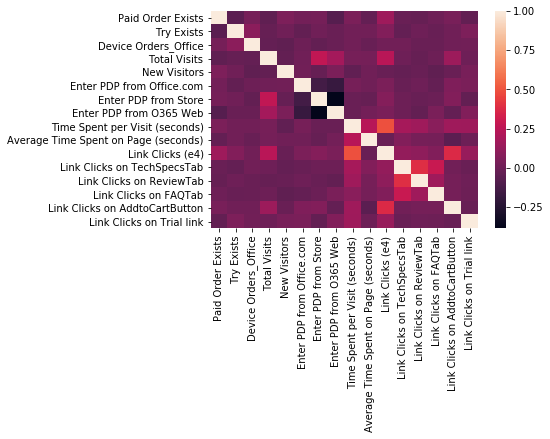

In [127]:
sns.heatmap(df_standard.corr())

## DF PCA

Text(0, 0.5, 'cumulative explained variance')

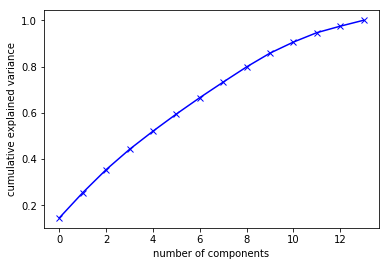

In [67]:
pca = PCA().fit(df_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bx-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

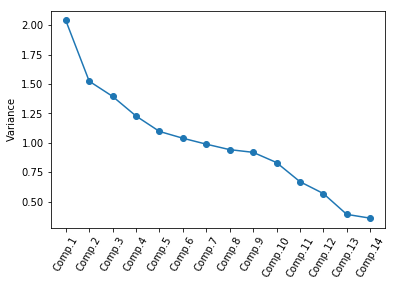

In [68]:
# https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#deciding-how-many-principal-components-to-retain

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, df_standard)


In [71]:
## as per Kaiser's rule take comp where variance >1 so 8 components

In [69]:
pca.components_[0]

array([ 0.01688417,  0.21435647, -0.05062133,  0.04600987,  0.08606447,
        0.01927272,  0.49525904,  0.13980495,  0.51940771,  0.35608231,
        0.31534554,  0.24438405,  0.31723334,  0.14177093])

In [70]:
pca8= PCA(n_components=8)
pca8.fit(df_standard)
df_pca8 = pca8.transform(df_standard)
df_pca8

array([[ 1.65309711e+00, -4.24762057e-01, -1.88890088e+00, ...,
         9.45671450e+00,  3.19126529e+00,  6.32941189e+00],
       [ 3.09387565e+00,  4.18567087e-01, -1.00886024e+00, ...,
         9.69014869e+00,  3.43995784e+00,  6.33844507e+00],
       [ 9.55892028e-01, -3.31793546e-01, -1.16460288e+00, ...,
         9.36676142e+00,  5.59414131e+00,  4.78904501e+00],
       ...,
       [ 1.13995213e-18, -6.26540596e-17, -1.66571320e-17, ...,
        -4.12464566e-17, -5.94557457e-18,  2.16148856e-17],
       [ 1.13995213e-18, -6.26540596e-17, -1.66571320e-17, ...,
        -4.12464566e-17, -5.94557457e-18,  2.16148856e-17],
       [ 1.13995213e-18, -6.26540596e-17, -1.66571320e-17, ...,
        -4.12464566e-17, -5.94557457e-18,  2.16148856e-17]])

In [71]:
len(df_pca8)

2362

## DF Elbow 1

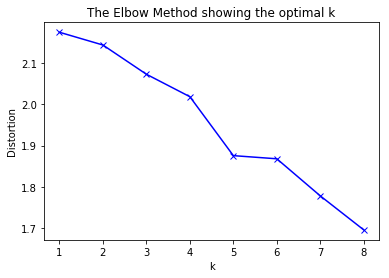

In [72]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K = range(1,9)
distortions= []
for k in K:
    kmeansModel = KMeans(k)
    kmeansModel.fit(df_pca8)
    distortions.append(sum(np.min(cdist(df_pca8, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca8.shape[0])

    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [76]:
### K =4

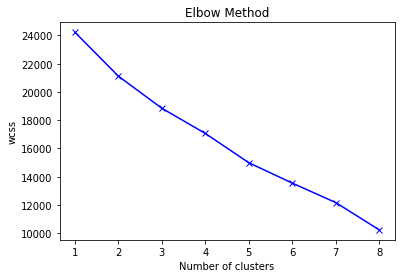

In [73]:
wcss = []
for i in range(1,9):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_pca8)
    wcss.append(km.inertia_)
plt.plot(range(1,9),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## KMeans clustering

In [74]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(n_clusters=nclust,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    print (model.inertia_, model.score)
    return (clust_labels, cent)

#k=7
clust_labels5, cent5 = doKmeans(df_pca8, 5)
clust_labels6, cent6 = doKmeans(df_pca8, 6)
clust_labels7, cent7 = doKmeans(df_pca8, 7)
clust_labels8, cent8 = doKmeans(df_pca8, 8)
#clust_labels6, cent6 = doKmeans(df_pca8, 6)
#clust_labels7, cent7 = doKmeans(df_pca, 7)
#clust_labels8, cent8 = doKmeans(df_pca, 8)

kmeans5 = pd.DataFrame(clust_labels5)
kmeans6 = pd.DataFrame(clust_labels6)
kmeans7 = pd.DataFrame(clust_labels7)
kmeans8 = pd.DataFrame(clust_labels8)
#kmeans6 = pd.DataFrame(clust_labels6)



14984.757916358602 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
13542.541118181218 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
12163.456594238582 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
10228.007543628024 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>


In [75]:
df_kmeans_result= pd.DataFrame(df_pca8, columns=df_standard.columns[:8])
df_kmeans_result['cluster5'] = kmeans5
df_kmeans_result['cluster6'] = kmeans6
df_kmeans_result['cluster7'] = kmeans7
df_kmeans_result['cluster8'] = kmeans8


df_kmeans_result.head()

Device Orders_Office  Total Visits  New Visitors  \
0              1.653097     -0.424762     -1.888901   
1              3.093876      0.418567     -1.008860   
2              0.955892     -0.331794     -1.164603   
3             -0.382041     -0.454532     -0.130629   
4             -0.301759      0.496493      1.301193   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                   1.479731             -4.131922                 9.456714   
1                   2.895858             -3.770890                 9.690149   
2                   3.027110             -3.215069                 9.366761   
3                   4.873462             -4.282146                 6.757811   
4                   1.396735             -3.296279                 9.299773   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                        3.191265                              6.329412   
1                        3.439958                              6.338445   
2                        5.594141                              4.789045   
3                        2.095394                              7.316358   
4                        3.620249                              6.414980   

   cluster5  cluster6  cluster7  cluster8  
0         3         2         5         4  
1         3         2         5         4  
2         3         2         5         4  
3         3         2         5         4  
4         3         2         5         4

In [76]:
df_kmeans_result.shape

(2362, 12)

In [78]:
df_centroid5 = pd.DataFrame(cent5, columns=df_standard.columns[:8]) 
df_centroid5.head()

Device Orders_Office  Total Visits  New Visitors  \
0             -0.253883     -0.311683     -0.460181   
1             -0.362735      0.608374      1.069499   
2              6.765768     -5.941441      3.865527   
3              0.445848     -0.421295     -0.475667   
4              3.481239      1.715998     -1.413697   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                  -0.072017             -0.006517                -0.155500   
1                   0.086586              0.163059                 0.216651   
2                  -1.914907             -1.158194                -1.031411   
3                   1.914243             -3.950926                 8.748490   
4                   0.603521             -0.133187                -0.112778   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  
0                       -0.116031                              0.121730  
1                        0.101198                             -0.306065  
2                        0.402552                             -0.257514  
3                        3.453372                              6.687662  
4                        0.333088                             -0.413983

In [79]:
df_centroid5.to_csv("df_centroid5.csv")

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


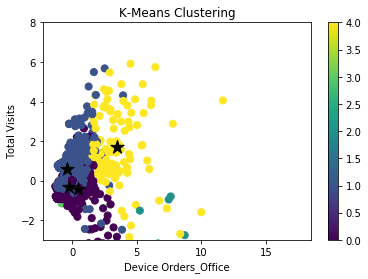

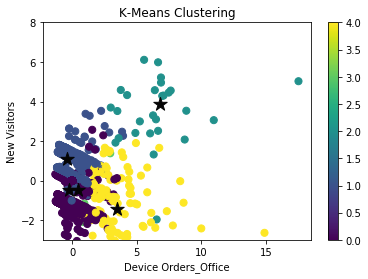

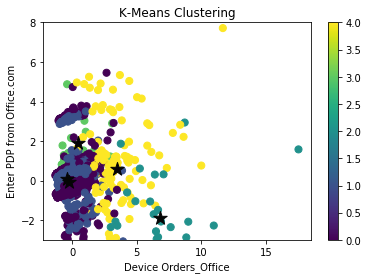

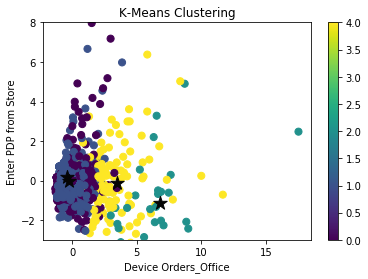

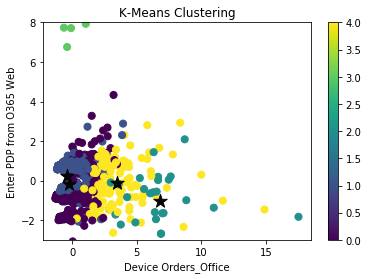

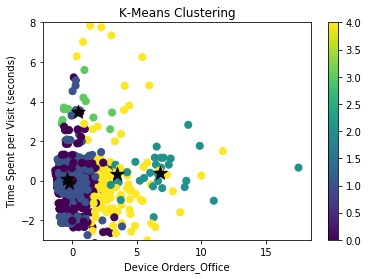

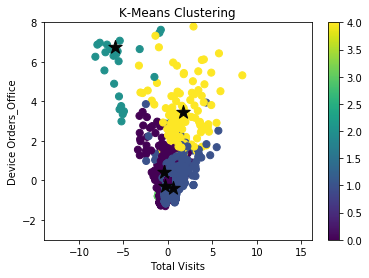

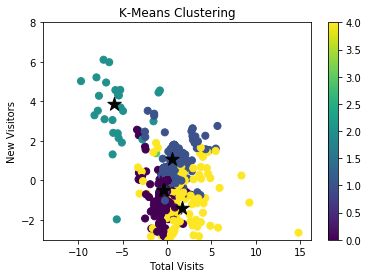

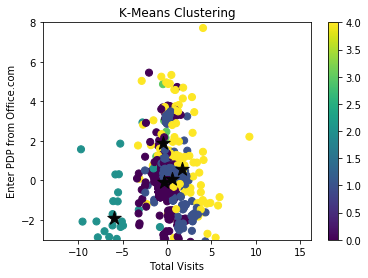

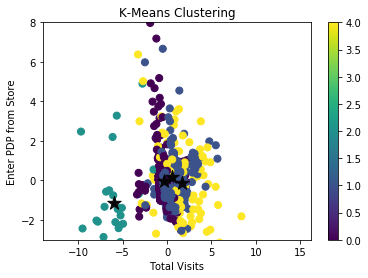

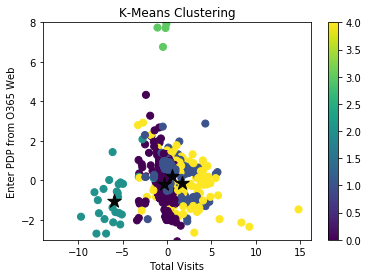

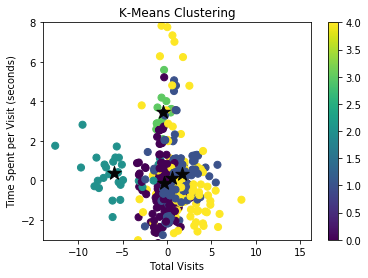

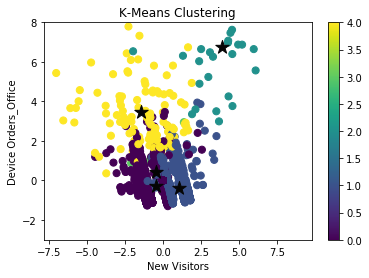

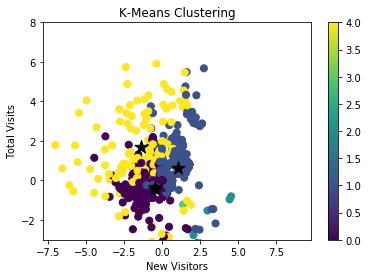

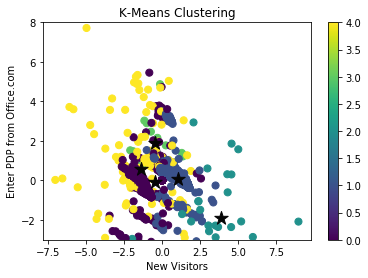

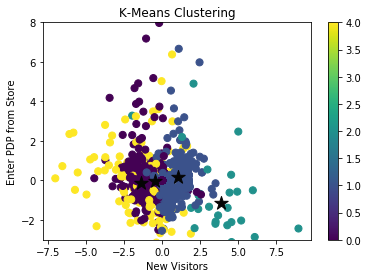

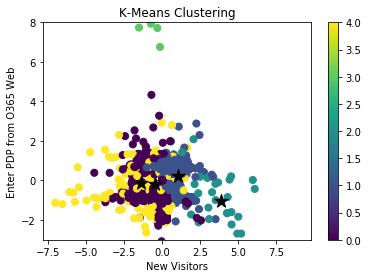

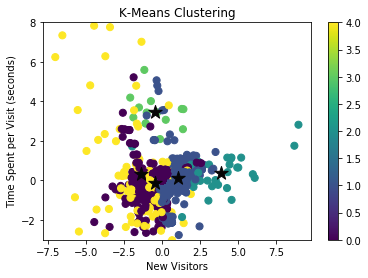

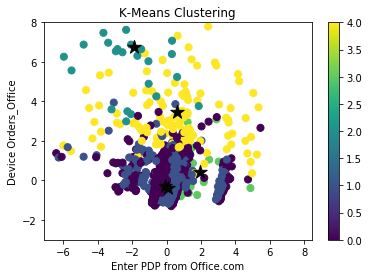

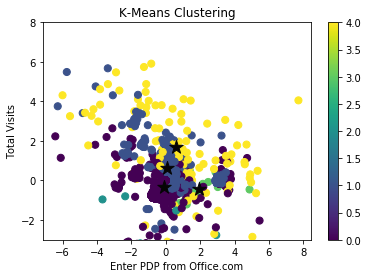

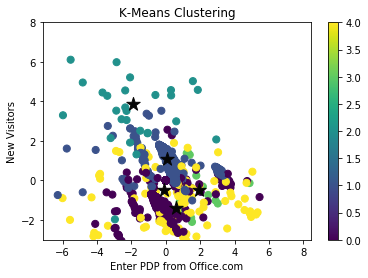

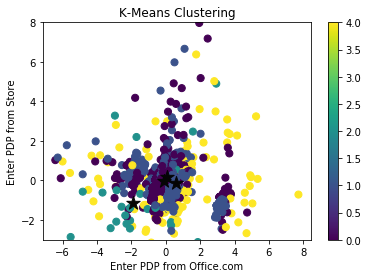

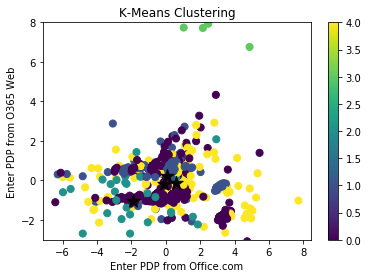

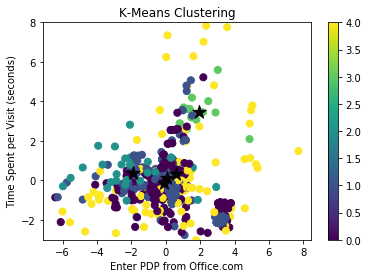

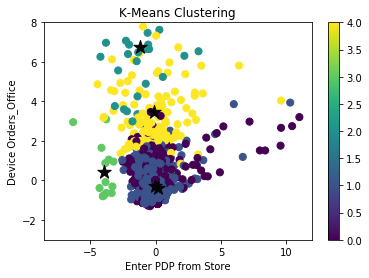

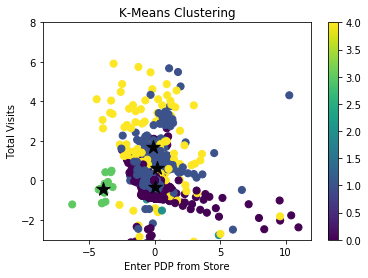

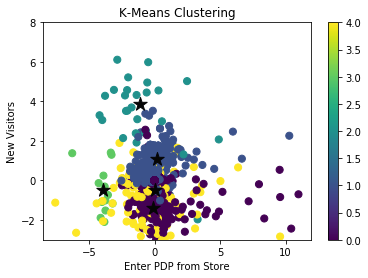

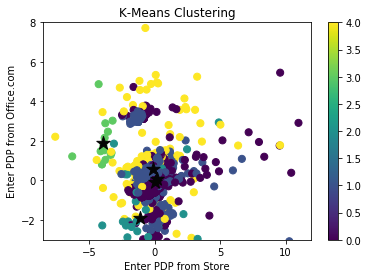

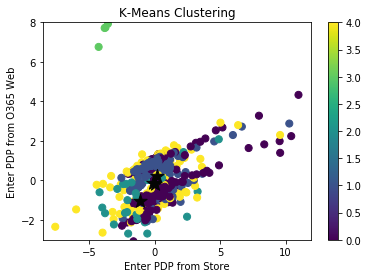

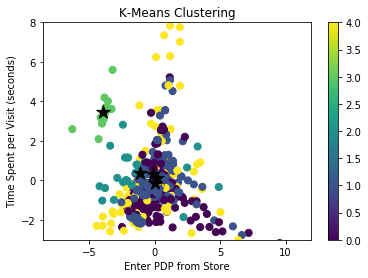

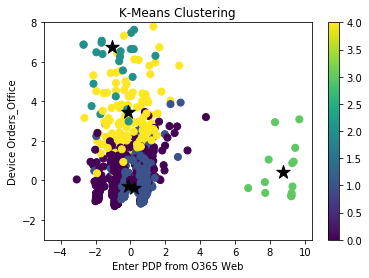

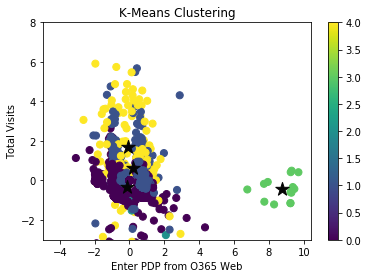

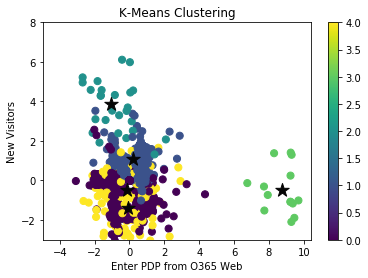

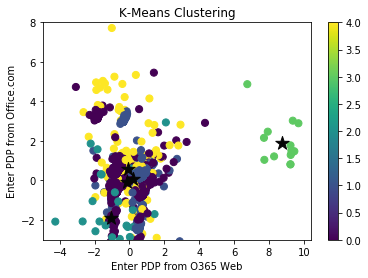

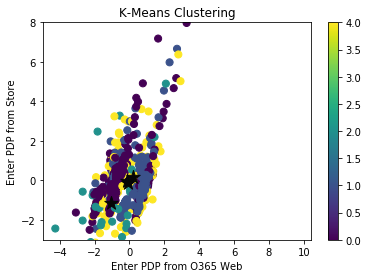

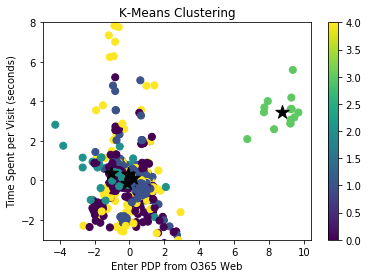

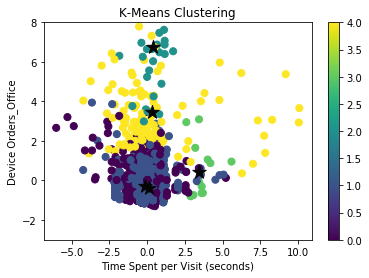

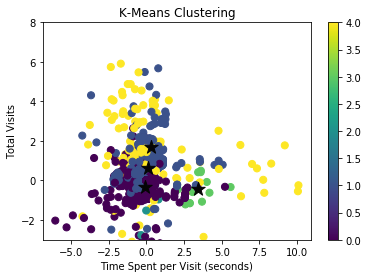

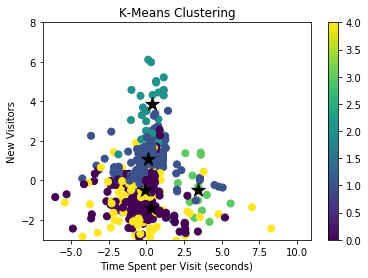

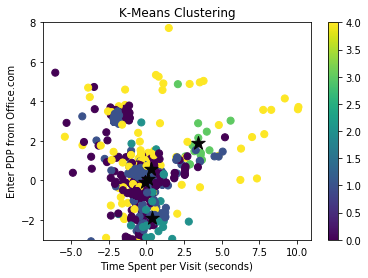

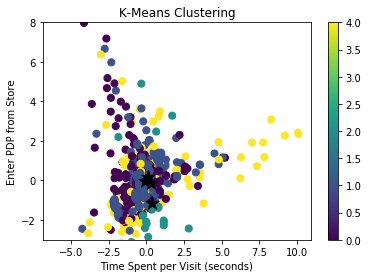

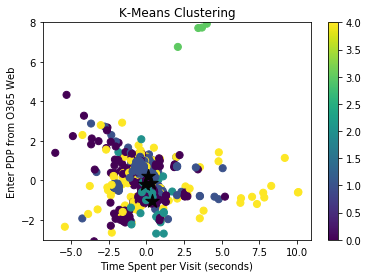

In [81]:
cols = df_kmeans_result.columns

#group = ("Paid Order", "Trial Order")

# plot from PCA
for cc in range(0,7):
    for r in range(0,7):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_kmeans_result.iloc[:,cc],df_kmeans_result.iloc[:,r],
                     c=df_kmeans_result['cluster5'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('K-Means Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.scatter(cent5[:, cc], cent5[:,r], marker='*', s=200, c='#050505')
        plt.ylim(-3,8)
        

In [82]:
len(kmeans5)

2362

In [83]:
df_standard.shape

(2362, 14)

In [84]:
df_standard['cluster5'] = kmeans5
df_standard.head()

Device Orders_Office  Total Visits  New Visitors  \
0             12.937183     -0.314318     -1.206236   
1             12.937183     -0.314318     -1.206236   
2             12.937183     -0.314318     -1.206236   
3             12.937183     -0.314318      1.113855   
4             12.937183     -0.314318     -1.206236   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                  -0.288146             -0.721120                 1.299333   
1                  -0.288146             -0.721120                -0.894930   
2                  -0.288146             -0.721120                -0.894930   
3                   4.402236             -0.721120                -0.894930   
4                  -0.288146              1.546731                -0.894930   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                    1.685643e+00                         -6.171073e-01   
1                    3.324316e+00                         -6.798840e-01   
2                    6.531200e-01                         -1.189482e-16   
3                   -9.043474e-17                         -1.189482e-16   
4                   -3.587209e-01                         -1.189482e-16   

   Link Clicks (e4)  Link Clicks on TechSpecsTab  Link Clicks on ReviewTab  \
0          1.895779                    -0.164432                 -0.120964   
1          3.205496                    -0.164432                 -0.120964   
2          0.448198                    -0.164432                 -0.120964   
3         -0.689187                    -0.164432                 -0.120964   
4         -0.378991                    -0.164432                 -0.120964   

   Link Clicks on FAQTab  Link Clicks on AddtoCartButton  \
0              -0.111088                       -0.286272   
1              -0.111088                       -0.286272   
2              -0.111088                       -0.286272   
3              -0.111088                       -0.286272   
4              -0.111088                       -0.286272   

   Link Clicks on Trial link  cluster5  
0                  -0.192709         3  
1                  -0.192709         3  
2                   3.489717         3  
3                  -0.192709         3  
4                  -0.192709         3

In [85]:
#df_buy_try.index[df_buy_try['cluster2'].isna()]

In [86]:
#df_buy_try.drop(df_buy_try.index[df_buy_try['cluster2'].isna()], inplace=True)

In [87]:
df_standard['cluster5'].value_counts()

0    1489
1     706
4     124
2      29
3      14
Name: cluster5, dtype: int64

In [153]:
df.head()

MC1ID  Paid Order Exists  Try Exists  \
2  bb7e2062bd4142a194eaa8818bf04169                1.0         0.0   
3  c3d457532b31409da308173a867c96b5                1.0         0.0   
4  0bc59fdb65094105bb31a39094df49d4                1.0         0.0   
5  5f1827ae627a4bb79a221860eac95856                0.0         1.0   
6  de1954cb3f34428999a3994f0b7d8ab9                0.0         1.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
2                   1.0           1.0           0.0              1.0   
3                   1.0           1.0           0.0              1.0   
4                   1.0           1.0           0.0              1.0   
5                   1.0           1.0           1.0              0.0   
6                   1.0           1.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   
5                        1.0                   0.0                      0.0   
6                        0.0                   1.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
2                          1514.0                                  28.5   
3                          2544.0                                  21.0   
4                           865.0                                   NaN   
5                             NaN                                   NaN   
6                           229.0                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
2              76.0                         0.0                          0.0   
3             114.0                         0.0                          0.0   
4              34.0                         0.0                          0.0   
5               1.0                         0.0                          0.0   
6              10.0                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   
5                       0.0                    0.0   
6                       0.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  
2                             0.0                        0.0  
3                             0.0                        0.0  
4                             0.0                        2.0  
5                             0.0                        0.0  
6                             0.0                        0.0

In [88]:
df_result = pd.DataFrame(df, columns=df.columns)
df_result['cluster5']=kmeans5
df_result.head()

MC1ID  Paid Order Exists  Try Exists  \
2  bb7e2062bd4142a194eaa8818bf04169                1.0         0.0   
3  c3d457532b31409da308173a867c96b5                1.0         0.0   
4  0bc59fdb65094105bb31a39094df49d4                1.0         0.0   
5  5f1827ae627a4bb79a221860eac95856                0.0         1.0   
6  de1954cb3f34428999a3994f0b7d8ab9                0.0         1.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
2                   1.0           1.0           0.0              1.0   
3                   1.0           1.0           0.0              1.0   
4                   1.0           1.0           0.0              1.0   
5                   1.0           1.0           1.0              0.0   
6                   1.0           1.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   
5                        1.0                   0.0                      0.0   
6                        0.0                   1.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
2                          1514.0                                  28.5   
3                          2544.0                                  21.0   
4                           865.0                                   NaN   
5                             NaN                                   NaN   
6                           229.0                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
2              76.0                         0.0                          0.0   
3             114.0                         0.0                          0.0   
4              34.0                         0.0                          0.0   
5               1.0                         0.0                          0.0   
6              10.0                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   
5                       0.0                    0.0   
6                       0.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  cluster5  
2                             0.0                        0.0       3.0  
3                             0.0                        0.0       3.0  
4                             0.0                        2.0       3.0  
5                             0.0                        0.0       3.0  
6                             0.0                        0.0       3.0

In [89]:
df_result.groupby(['cluster5']).mean()

Paid Order Exists  Try Exists  Device Orders_Office  Total Visits  \
cluster5                                                                      
0.0                0.084633    0.020045              0.001114      1.080178   
1.0                0.120000    0.028571              0.000000      1.098571   
2.0                0.035714    0.000000              0.000000      1.178571   
3.0                0.250000    0.250000              1.000000      1.000000   
4.0                0.141667    0.075000              0.008333      1.491667   

          New Visitors  Return Visitors  Enter PDP from Office.com  \
cluster5                                                             
0.0           0.648107         0.351893                   0.043430   
1.0           0.364286         0.635714                   0.071429   
2.0           0.392857         0.607143                   0.142857   
3.0           0.333333         0.666667                   0.083333   
4.0           0.516667         0.483333                   0.116667   

          Enter PDP from Store  Enter PDP from O365 Web  \
cluster5                                                  
0.0                   0.080178                 0.672606   
1.0                   0.607143                 0.062857   
2.0                   0.321429                 0.357143   
3.0                   0.166667                 0.416667   
4.0                   0.425000                 0.450000   

          Time Spent per Visit (seconds)  \
cluster5                                   
0.0                           452.693811   
1.0                           418.716106   
2.0                           653.659091   
3.0                           686.090909   
4.0                           664.644706   

          Average Time Spent on Page (seconds)  Link Clicks (e4)  \
cluster5                                                           
0.0                                 107.908094         19.153675   
1.0                                  86.940724         20.782857   
2.0                                  94.659091         31.714286   
3.0                                  39.125000         31.083333   
4.0                                 185.675926         32.516667   

          Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
cluster5                                                            
0.0                         0.007795                     0.028953   
1.0                         0.012857                     0.027143   
2.0                         0.035714                     0.071429   
3.0                         0.000000                     0.000000   
4.0                         0.000000                     0.033333   

          Link Clicks on ReviewTab  Link Clicks on FAQTab  \
cluster5                                                    
0.0                       0.011136               0.015590   
1.0                       0.018571               0.010000   
2.0                       0.071429               0.035714   
3.0                       0.000000               0.000000   
4.0                       0.000000               0.016667   

          Link Clicks on AddtoCartButton  Link Clicks on Trial link  
cluster5                                                             
0.0                             0.170379                   0.124722  
1.0                             0.201429                   0.095714  
2.0                             0.178571                   0.071429  
3.0                             0.083333                   0.250000  
4.0                             0.241667                   0.000000

In [90]:
df_cluster0_mean = pd.DataFrame(df_result[df_result['cluster5']==0].mean())
df_cluster0_mean
df_cluster0_mean.to_csv("df_cluster0_mean.csv")

df_cluster1_mean = pd.DataFrame(df_result[df_result['cluster5']==1].mean())
df_cluster1_mean
df_cluster1_mean.to_csv("df_cluster1_mean.csv")

df_cluster2_mean = pd.DataFrame(df_result[df_result['cluster5']==2].mean())
df_cluster2_mean
df_cluster2_mean.to_csv("df_cluster2_mean.csv")

df_cluster3_mean = pd.DataFrame(df_result[df_result['cluster5']==3].mean())
df_cluster3_mean
df_cluster3_mean.to_csv("df_cluster3_mean.csv")

df_cluster4_mean = pd.DataFrame(df_result[df_result['cluster5']==4].mean())
df_cluster4_mean
df_cluster4_mean.to_csv("df_cluster4_mean.csv")



In [181]:
df_result[df_result['cluster5']==3]['Try Exists'].value_counts()

1.0    46
0.0    20
Name: Try Exists, dtype: int64

In [167]:
df_result.groupby(['cluster5']).agg(lambda x: x.value_counts().index[0])

MC1ID  Paid Order Exists  Try Exists  \
cluster5                                                                    
0.0       c6d6fd4bfbc34347b61d808519085991                0.0         0.0   
1.0       182f6ebf48dd4bd085cad3beea73f812                0.0         0.0   
2.0       6522f40ffb7140ce97c7942ed6f138a3                0.0         0.0   
3.0       69856e7b67924c26b77b999ee709cc70                0.0         1.0   
4.0       801e973f386b46349d913eec39740052                0.0         0.0   

          Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
cluster5                                                                      
0.0                        0.0           1.0           0.0              1.0   
1.0                        0.0           1.0           0.0              1.0   
2.0                        0.0           1.0           1.0              0.0   
3.0                        0.0           1.0           1.0              0.0   
4.0                        0.0           1.0           0.0              1.0   

          Enter PDP from Office.com  Enter PDP from Store  \
cluster5                                                    
0.0                             0.0                   0.0   
1.0                             0.0                   0.0   
2.0                             0.0                   0.0   
3.0                             0.0                   0.0   
4.0                             0.0                   0.0   

          Enter PDP from O365 Web  Time Spent per Visit (seconds)  \
cluster5                                                            
0.0                           0.0                             6.0   
1.0                           0.0                             6.0   
2.0                           1.0                             5.0   
3.0                           0.0                             5.0   
4.0                           0.0                            27.0   

          Average Time Spent on Page (seconds)  Link Clicks (e4)  \
cluster5                                                           
0.0                                   2.000000               1.0   
1.0                                   5.000000               1.0   
2.0                                   1.000000               2.0   
3.0                                   3.545455               1.0   
4.0                                  15.000000               2.0   

          Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
cluster5                                                            
0.0                              0.0                          0.0   
1.0                              0.0                          0.0   
2.0                              0.0                          0.0   
3.0                              0.0                          0.0   
4.0                              0.0                          0.0   

          Link Clicks on ReviewTab  Link Clicks on FAQTab  \
cluster5                                                    
0.0                            0.0                    0.0   
1.0                            0.0                    0.0   
2.0                            0.0                    0.0   
3.0                            0.0                    0.0   
4.0                            0.0                    0.0   

          Link Clicks on AddtoCartButton  Link Clicks on Trial link  
cluster5                                                             
0.0                                  0.0                        0.0  
1.0                                  0.0                        0.0  
2.0                                  0.0                        0.0  
3.0                                  0.0                        0.0  
4.0                                  0.0                        0.0

##  Agglomertive

In [188]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    print (model.affinity, model.connectivity)
    return (clust_labels1)

clust_labels2 = doAgglomerative(df_pca8, 2)
clust_labels3 = doAgglomerative(df_pca8, 3)
clust_labels4 = doAgglomerative(df_pca8, 4)
clust_labels5 = doAgglomerative(df_pca8, 5)
clust_labels6 = doAgglomerative(df_pca8, 6)

euclidean None
euclidean None
euclidean None
euclidean None
euclidean None


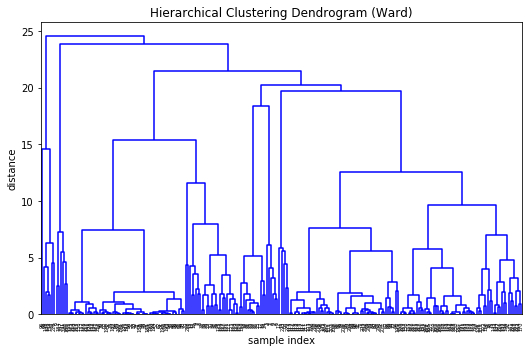

In [189]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_pca7, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

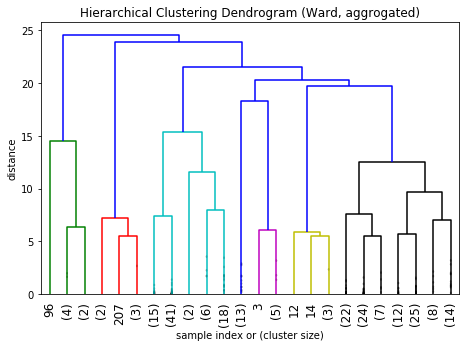

In [190]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [191]:
df_agglomerative_result= pd.DataFrame(df_pca8, columns=df_standard.columns[:8])
df_agglomerative_result['cluster2'] = clust_labels2
df_agglomerative_result['cluster3'] = clust_labels3
df_agglomerative_result['cluster4'] = clust_labels4
df_agglomerative_result['cluster5'] = clust_labels5
df_agglomerative_result['cluster6'] = clust_labels6

df_agglomerative_result.head()

Paid Order Exists  Try Exists  Device Orders_Office  Total Visits  \
0           2.040713    0.312544             -1.904391     -3.231858   
1           3.512868    1.191461             -1.035346     -4.489689   
2           1.345199    0.438874             -1.232531     -4.504732   
3          -0.047612    0.136956             -0.946490     -5.848182   
4           0.024631    0.953811              0.377906     -2.552860   

   New Visitors  Enter PDP from Office.com  Enter PDP from Store  \
0      3.524474                  -7.395925             -2.715070   
1      3.876455                  -6.966174             -2.734476   
2      4.777864                  -6.499706             -2.389462   
3      8.202908                  -7.360691              0.158780   
4     10.047992                  -7.923939             -1.527098   

   Enter PDP from O365 Web  cluster2  cluster3  cluster4  cluster5  cluster6  
0                -6.018689         0         2         2         2         2  
1                -6.151806         0         2         2         2         2  
2                -4.214593         0         2         2         2         2  
3                -1.235560         0         2         2         2         2  
4                -2.797166         0         2         2         2         2

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


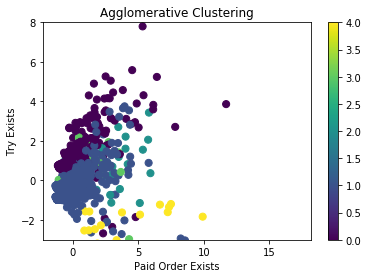

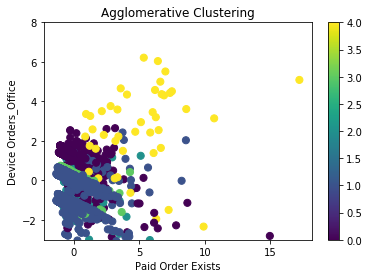

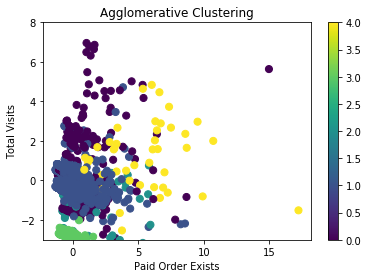

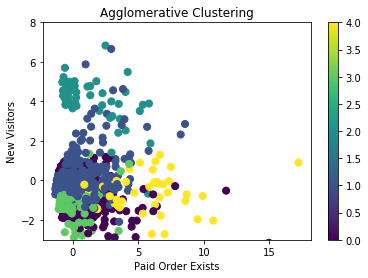

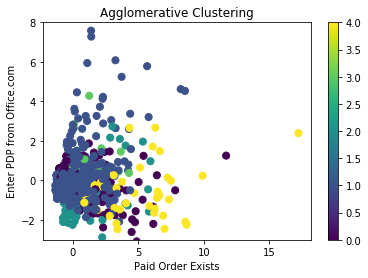

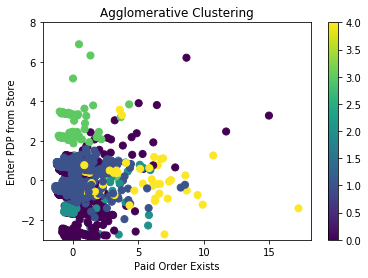

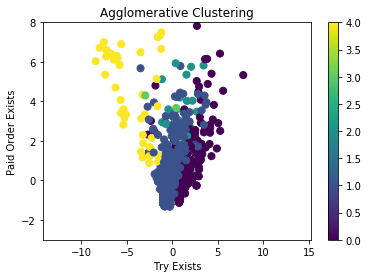

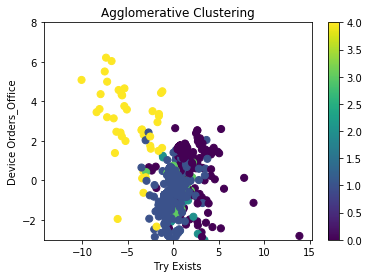

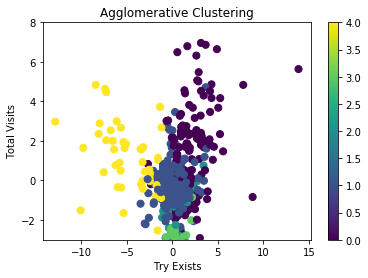

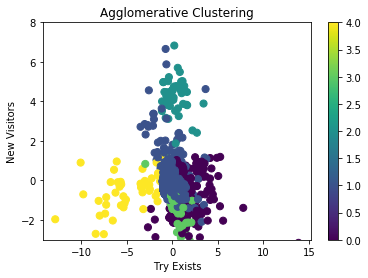

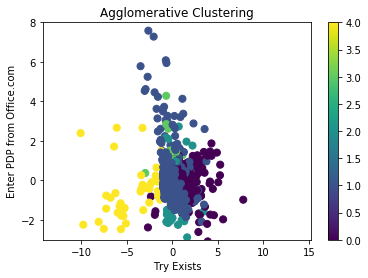

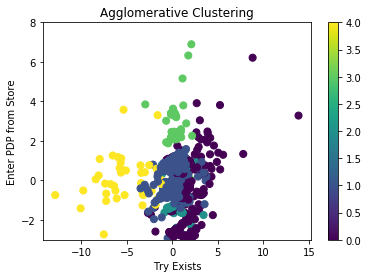

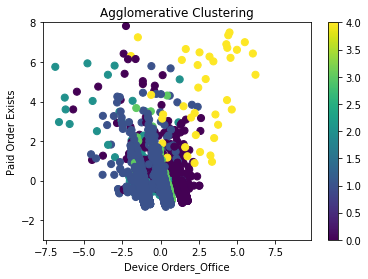

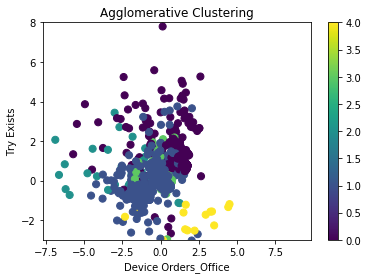

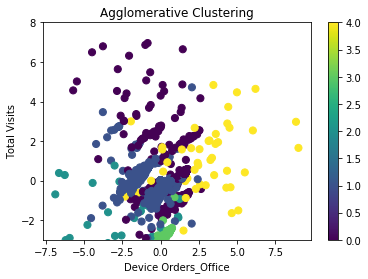

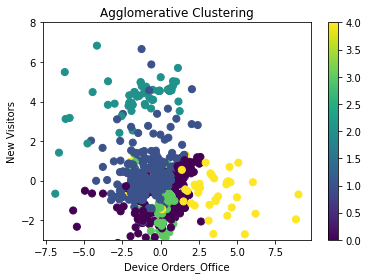

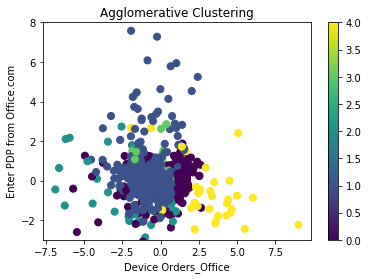

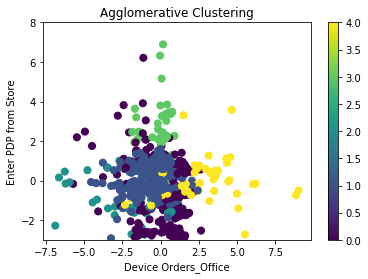

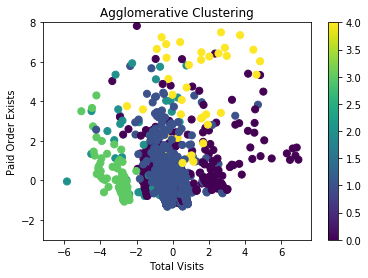

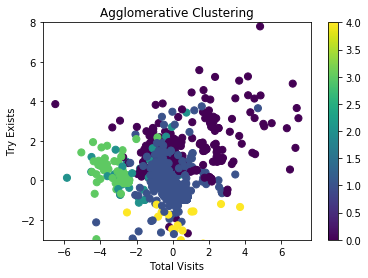

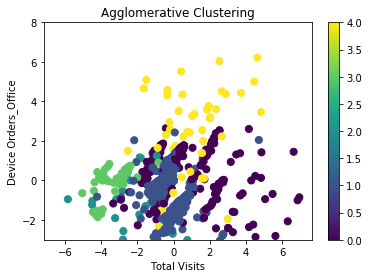

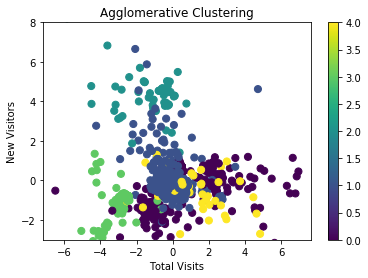

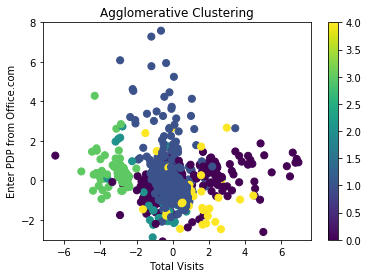

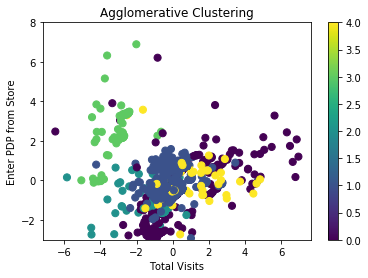

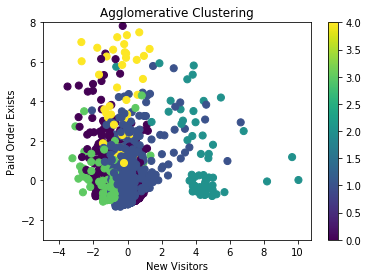

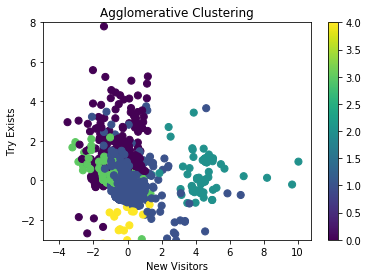

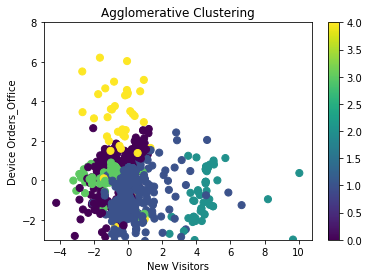

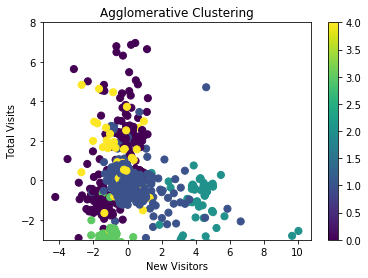

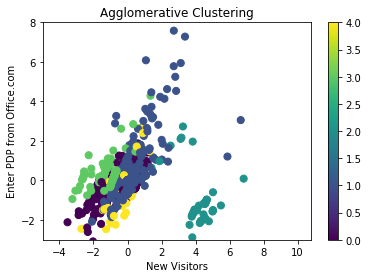

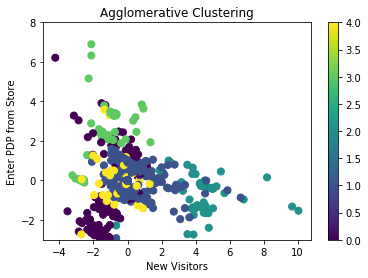

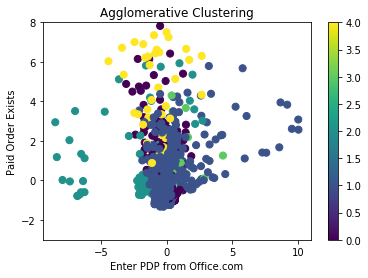

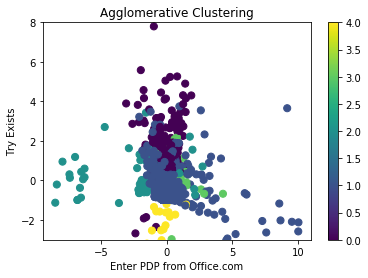

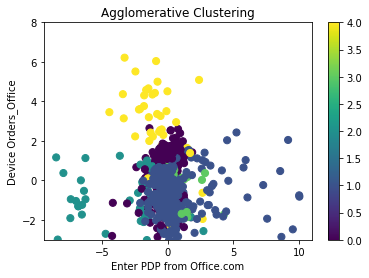

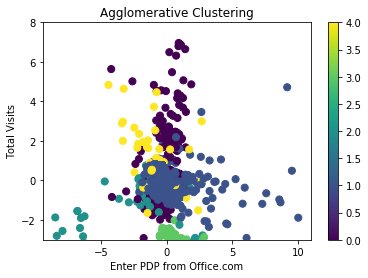

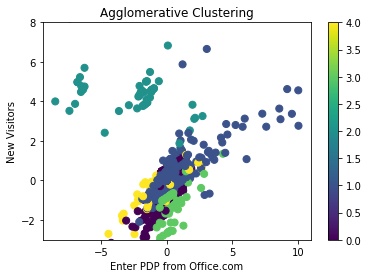

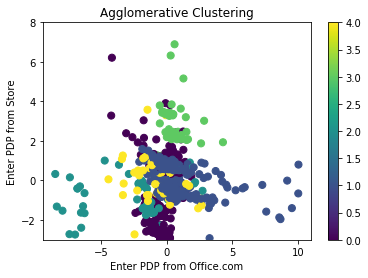

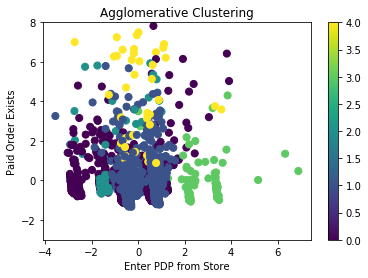

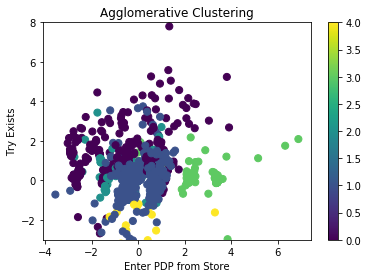

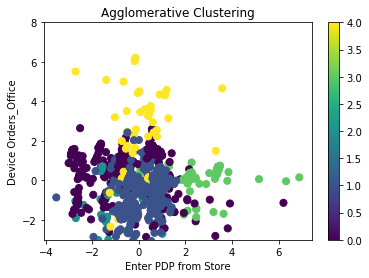

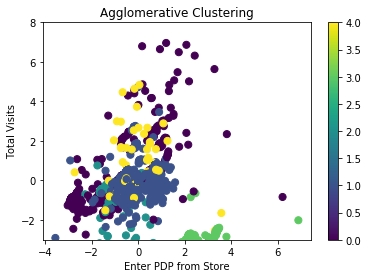

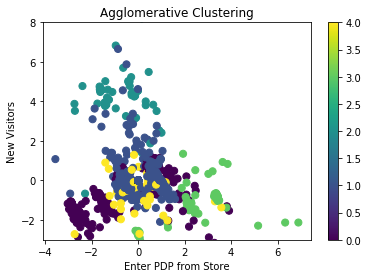

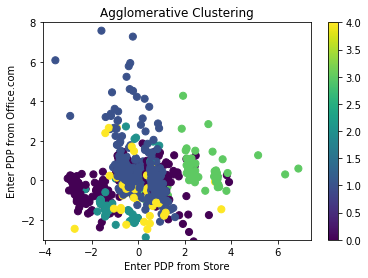

In [192]:
cols = df_agglomerative_result.columns

# plot from PCA
for cc in range(0,7):
  for r in range(0,7):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_agglomerative_result.iloc[:,cc],df_agglomerative_result.iloc[:,r],
                     c=df_agglomerative_result['cluster5'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('Agglomerative Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.ylim(-3,8)